# Ford GoBike Insights
## by Mario Gayed

## Investigation Overview

- Here we will be analyzing the data for Lyft (formerly named as Ford GoBike), which is an application you can use to rent a bicycle in the Bay area in San Fransisco, you can pick up and drop off a bicycle. We will be analyzing the data collected from users of Lyft, during February 2019 to get useful insights.

## Dataset Overview

- Our dataset contains information about bike rentals over February 2019, almost  183412 entries, and 16 columns that describe the trip duration, start and end time.. also the gender, user type and birth date of the members. These data can be found at https://www.lyft.com/bikes/bay-wheels/system-data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('df_clean.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## No. of Bike Rides Through The Week Days.

we can notice that the number of bike rides fall on weekends, it makes sense if most of the users are using it to get to/from work.

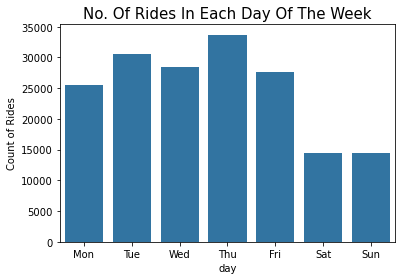

In [3]:
week_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_day_of_week', order = week_list, color = base_color)
plt.title('No. Of Rides In Each Day Of The Week', fontsize = 15)
plt.xlabel('day')
plt.ylabel('Count of Rides');

## Observing the ratio between Customers vs Subscribers

- In the plot below, we can notice that the majority of Lyft users are subscribers.

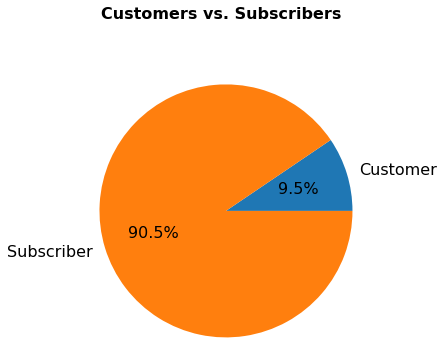

In [4]:
customer = df.query('user_type == "Customer"')['bike_id'].count()
subscriber = df.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df['bike_id'].count()
subscriber_prop = subscriber / df['bike_id'].count()

plt.figure(figsize = [5, 5])
labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
plt.pie(size, labels = labels, autopct='%1.1f%%', textprops={'color':'black','size':16})
plt.axis('equal')
plt.suptitle('Customers vs. Subscribers', y=1.07,fontsize=16, fontweight='bold');

## No. Of Rides Through The Week For Customers & Subscribers

- We can observe that subscriber's main purpose for bike riding is to get to/from work, while customers use it more for sport or leisure as we can see that customers rent more bikes on the weekends, much more than subscribers.

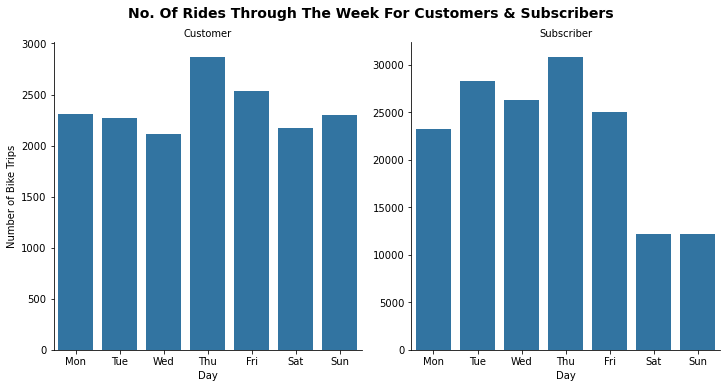

In [5]:
g = sb.catplot(data=df, x='start_day_of_week', col="user_type", kind='count', sharey = False, order = week_list, color = base_color)
g.set_axis_labels("Day", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('No. Of Rides Through The Week For Customers & Subscribers', y=1.03, fontsize=14, fontweight='semibold');

## Distances Traveled by different Genders And Ages

- We can notice in the user age vs distance plot, that there is a big variance between shortest and longest distances traveled, found in old ages. this may justify that old users (probably retired) are using Lyft rides just as a sport to go for long distances, or for leisure.

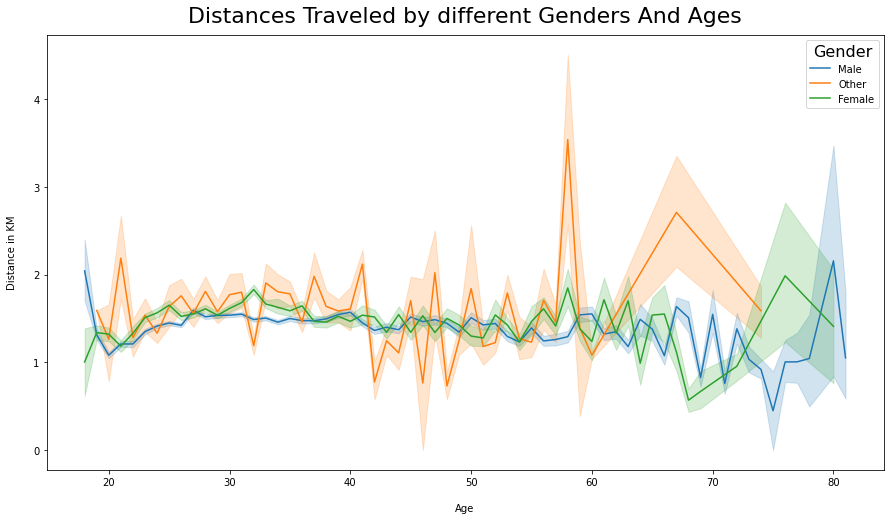

In [6]:
plt.figure(figsize=(15,8))
ax = sb.lineplot(x='age', y='distance', hue='member_gender',  data=df)
plt.title('Distances Traveled by different Genders And Ages', fontsize=22, y=1.015)
plt.xlabel('Age', labelpad=16)
plt.ylabel('Distance in KM', labelpad=16)
leg = ax.legend()
leg.set_title('Gender',prop={'size':16})
ax = plt.gca();

## Usage of the Bikeshare System per User Type and Gender through the Week

- we can safely say that most of the subscribers only use the app to get to/from work, while more customers use it during weekends for outings. We can also notice that males and females are having nearly the similar distrubution in bike usage through the week, only the no. of trips is what differs.

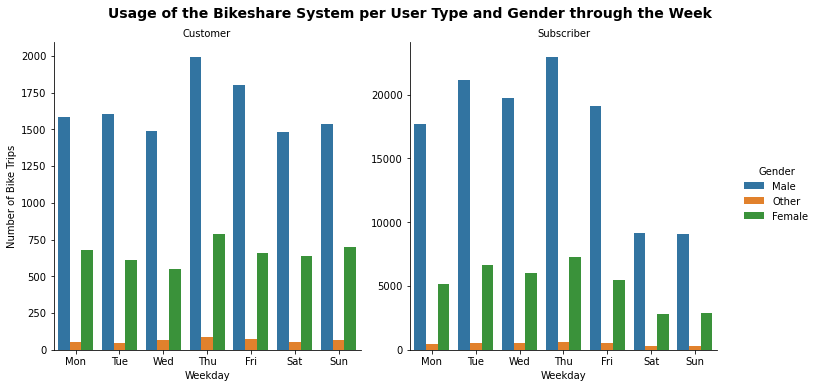

In [7]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df, x='start_day_of_week', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Usage of the Bikeshare System per User Type and Gender through the Week', y=1.03, fontsize=14, fontweight='semibold');


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!